In [49]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
from optimize_restarts import optimize_restarts
def get_dmap(target, path):
    
    with open(path) as f:
        pdb = f.readlines()
    
    coords = []
    for i in pdb:
        if i.startswith('ATOM'):
            line = i.split()
            atom, aa = line[2], line[3]
            x, y, z = float(line[6]), float(line[7]), float(line[8])
            if aa == 'GLY':
                if atom == 'CA':
                    coords.append([x, y, z])
            else:
                if atom == 'CB':
                    coords.append([x, y, z])
    coords = np.array(coords)
    
    
    L = len(coords)
    dmap = np.zeros((L, L))
    
    for i in range(L-1):
        for j in range(i + 1, L):
            dmap[i, j] = np.sqrt(np.sum((coords[i] - coords[j]) ** 2))
    dmap = dmap + dmap.T
    
    bins = np.concatenate(([0], np.linspace(2, 22, 31)))
    dmap_d = np.digitize(dmap, bins)
    return torch.from_numpy(dmap_d)

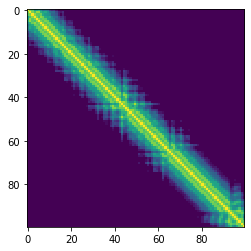

In [50]:
d4i4t = get_dmap('4i4tE01', '../../steps/folded_structures/structures/relaxed/4i4tE01_relaxed.pdb')
torch.save(d4i4t, '../../steps/folded_structures/structures/relaxed/distmaps/4i4tE01_dmap.pt')

plt.imshow(d4i4t, cmap='viridis_r')

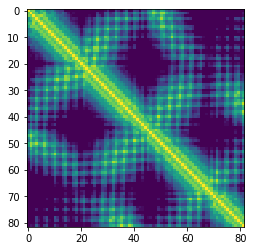

In [51]:
d = get_dmap('1vmgA00', '../../steps/folded_structures/structures/relaxed/1vmgA00_relaxed.pdb')
torch.save(d, '../../steps/folded_structures/structures/relaxed/distmaps/1vmgA00_dmap.pt')

plt.imshow(d, cmap='viridis_r')

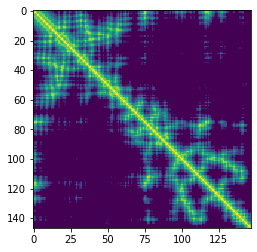

In [52]:
d = get_dmap('4mveA00', '../../steps/folded_structures/structures/relaxed/4mveA00_relaxed.pdb')
torch.save(d, '../../steps/folded_structures/structures/relaxed/distmaps/4mveA00_dmap.pt')

plt.imshow(d, cmap='viridis_r')

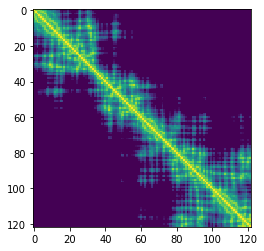

In [53]:
d = get_dmap('2l1iA00', '../../steps/folded_structures/structures/relaxed/2l1iA00_relaxed.pdb')
torch.save(d, '../../steps/folded_structures/structures/relaxed/distmaps/2l1iA00_dmap.pt')

plt.imshow(d, cmap='viridis_r')

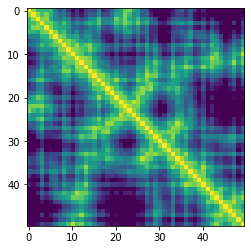

In [54]:
d = get_dmap('3m4yA01', '../../steps/folded_structures/structures/relaxed/3m4yA01_relaxed.pdb')
torch.save(d, '../../steps/folded_structures/structures/relaxed/distmaps/3m4yA01_dmap.pt')

plt.imshow(d, cmap='viridis_r')